<a href="https://colab.research.google.com/github/mrcrdg/jupyter_set/blob/master/ROC_Curves_and_AUC_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ROC Curves

Toy example: 

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

Generate some data with some probabilities

In [ ]:
y = np.array([1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2])
scores = np.array([0.1, 0.1, 0.2, 0.3, 0.4, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
fpr, tpr, thresholds = roc_curve(y, scores, pos_label=2)
roc_auc = roc_auc_score(y, scores)
print("AUC: {}".format(roc_auc))

AUC: 0.7857142857142858


Plot the ROC curve

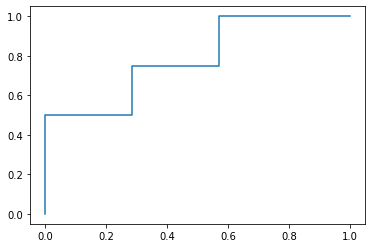

In [ ]:
plt.figure()
plt.plot(fpr, tpr)

## A more real example

First do the needed imports

In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

Let's generate some data

In [ ]:
# generate 2 class dataset
X, Y = make_classification(n_samples=1000, n_features=5, n_classes=2, 
                           random_state=1)

Inspect the generated clasification problem

In [ ]:
X[:5]

array([[-1.39087601,  0.62478042,  3.4809096 ,  2.3823372 ,  0.38622388],
       [-0.48529475,  0.30051483,  1.33915253,  0.84620081,  1.17745439],
       [-0.73504687,  0.13412273,  1.54350554,  1.22343943, -0.62879943],
       [ 0.6594484 ,  1.47747999,  1.0281535 , -0.80770875, -0.34350003],
       [ 0.17288184,  0.99271923,  1.18375139, -0.10191134,  0.08911753]])

In [ ]:
Y[:10]

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0])

Now we will split the data into train and test:

In [ ]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.5, 
                                                random_state=2)

Let's train a Logistic Regression Model

In [ ]:
# fit a model
model = LogisticRegression()
model.fit(trainX, trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Now we need to evaluate the model on the test Data.

In [ ]:
pred_prob = model.predict_proba(testX)

We are going to keep only the positive outcome

In [ ]:
pred_prob = pred_prob[:,1]

Calculate the AUC score:

In [ ]:
auc = roc_auc_score(testY, pred_prob)
print("AUC score: {:.3f}".format(auc))

AUC score: 0.934


Let's calculate the ROC curve parameters:

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(testY, 
                                                                pred_prob)

In [ ]:
thresholds

array([1.99908406e+00, 9.99084055e-01, 9.57352912e-01, 9.56858653e-01,
       9.22318086e-01, 9.22033477e-01, 9.10108838e-01, 9.08405345e-01,
       8.86861981e-01, 8.86484147e-01, 8.85071397e-01, 8.83524086e-01,
       8.46080635e-01, 8.44828861e-01, 8.33978603e-01, 8.30958702e-01,
       8.12248239e-01, 8.12149104e-01, 7.98410990e-01, 7.98339264e-01,
       7.77237346e-01, 7.74813814e-01, 7.67204554e-01, 7.61994279e-01,
       7.26183768e-01, 7.26070252e-01, 7.20544680e-01, 7.17619830e-01,
       6.81943633e-01, 6.79844992e-01, 6.68820045e-01, 6.62512323e-01,
       6.49650133e-01, 6.39874271e-01, 6.36939202e-01, 6.36500750e-01,
       6.24258500e-01, 6.23801996e-01, 5.95035817e-01, 5.90411214e-01,
       5.63198784e-01, 5.62913555e-01, 5.01094978e-01, 4.89883619e-01,
       4.85615535e-01, 4.77044290e-01, 4.61820824e-01, 4.37522669e-01,
       4.35191800e-01, 4.29798204e-01, 4.26126764e-01, 4.21353424e-01,
       4.06040960e-01, 3.97777828e-01, 3.95993550e-01, 3.84623522e-01,
      

Now we plot the curve:

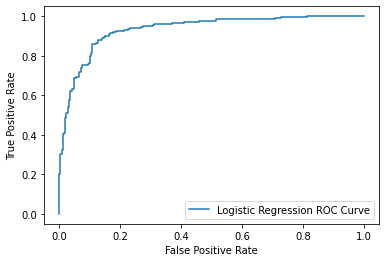

In [ ]:
pyplot.plot(false_positive_rate, true_positive_rate, 
            label='Logistic Regression ROC Curve')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Exercise

The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

### Download and read the data:

In [ ]:
!pip install gdown

In [ ]:
!gdown https://drive.google.com/uc?id=1AjsJi7hWN1jfNuqb2wFbFtQUGBbt0xe7

Downloading...
From: https://drive.google.com/uc?id=1AjsJi7hWN1jfNuqb2wFbFtQUGBbt0xe7
To: /content/framingham.csv
100% 196k/196k [00:00<00:00, 70.7MB/s]


In [ ]:
!head -10 framingham.csv

male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,39,4,0,0,0,0,0,0,195,106,70,26.97,80,77,0
0,46,2,0,0,0,0,0,0,250,121,81,28.73,95,76,0
1,48,1,1,20,0,0,0,0,245,127.5,80,25.34,75,70,0
0,61,3,1,30,0,0,1,0,225,150,95,28.58,65,103,1
0,46,3,1,23,0,0,0,0,285,130,84,23.1,85,85,0
0,43,2,0,0,0,0,1,0,228,180,110,30.3,77,99,0
0,63,1,0,0,0,0,0,0,205,138,71,33.11,60,85,1
0,45,2,1,20,0,0,0,0,313,100,71,21.68,79,78,0
1,52,1,0,0,0,0,1,0,260,141.5,89,26.36,76,79,0


Read the data using Pandas

In [ ]:
import pandas as pd

In [ ]:
df_heart=pd.read_csv("framingham.csv")

In [ ]:
heart_df.head()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,BMI
0,106.0,77.0,39,195.0,0.0,70.0,0,0,0.0,1,26.97
1,121.0,76.0,46,250.0,0.0,81.0,0,0,0.0,0,28.73
2,127.5,70.0,48,245.0,20.0,80.0,0,0,0.0,1,25.34
3,150.0,103.0,61,225.0,30.0,95.0,1,0,0.0,0,28.58
4,130.0,85.0,46,285.0,23.0,84.0,0,0,0.0,0,23.10


## Tasks

1. Explore the data and build a Logistic Regression classifier to predict the `TenYearCHD` variable. 
1. Try a combination of variables in order to build the best classifier.
1. Build ROC curves and calculate the AUC to compare the classifiers.
1. Compare with Naive Bayes classifiers

In [ ]:
df_heart.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df_heart.shape

(4238, 16)

In [ ]:
df_heart.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [ ]:
# dupicates
duplicate_df = df_heart[df_heart.duplicated()]
duplicate_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [ ]:
# missing values
df_heart.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
null = df_heart[df_heart.isna().any(axis=1)]
null

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,0,39,2.0,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,NaN,0
21,0,43,1.0,0,0.0,0.0,0,0,0,185.0,123.5,77.5,29.89,70.0,NaN,0
26,0,60,1.0,0,0.0,0.0,0,0,0,260.0,110.0,72.5,26.59,65.0,NaN,0
33,1,61,NaN,1,5.0,0.0,0,0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
36,1,56,NaN,0,0.0,0.0,0,0,0,257.0,153.5,102.0,28.09,72.0,75.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,0,51,1.0,1,9.0,0.0,0,0,0,340.0,152.0,76.0,25.74,70.0,NaN,0
4229,0,51,3.0,1,20.0,0.0,0,1,0,251.0,140.0,80.0,25.60,75.0,NaN,0
4230,0,56,1.0,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,NaN,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0


In [ ]:
#Remover os NaN

In [ ]:
df_heart.dropna(inplace=True)
df_heart.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
df_heart.shape

(3655, 16)

In [ ]:
df_heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f33cdee5e80>,
      dtype=object)

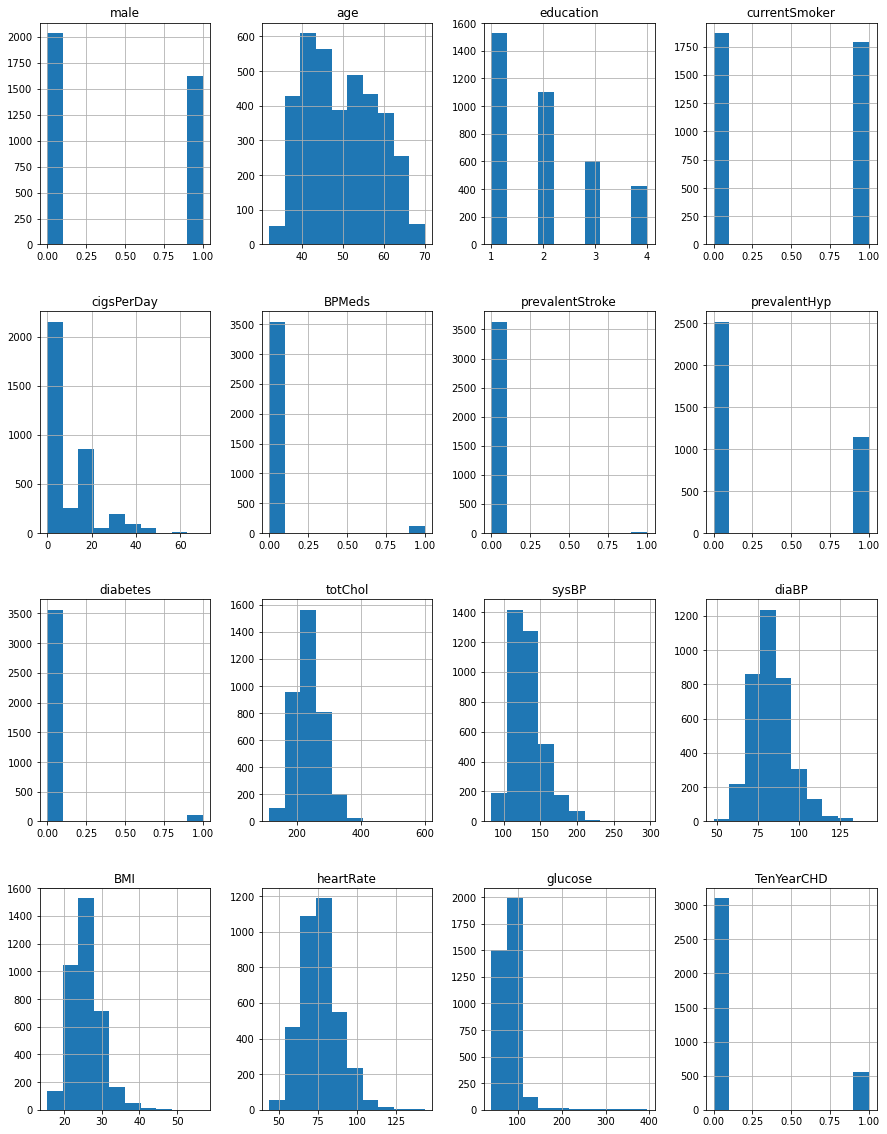

In [ ]:
# histograms
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_heart.hist(ax = ax)

In [ ]:
import seaborn as sns

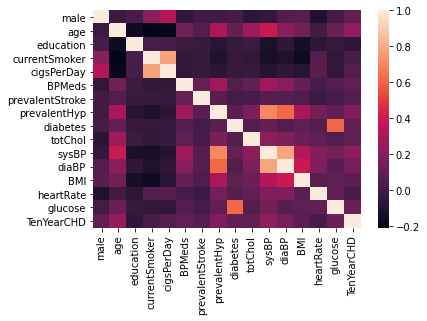

In [ ]:
# correlação de Pearson
df_corr = df_heart.corr()
sns.heatmap(df_corr)

### Analise Exploratória

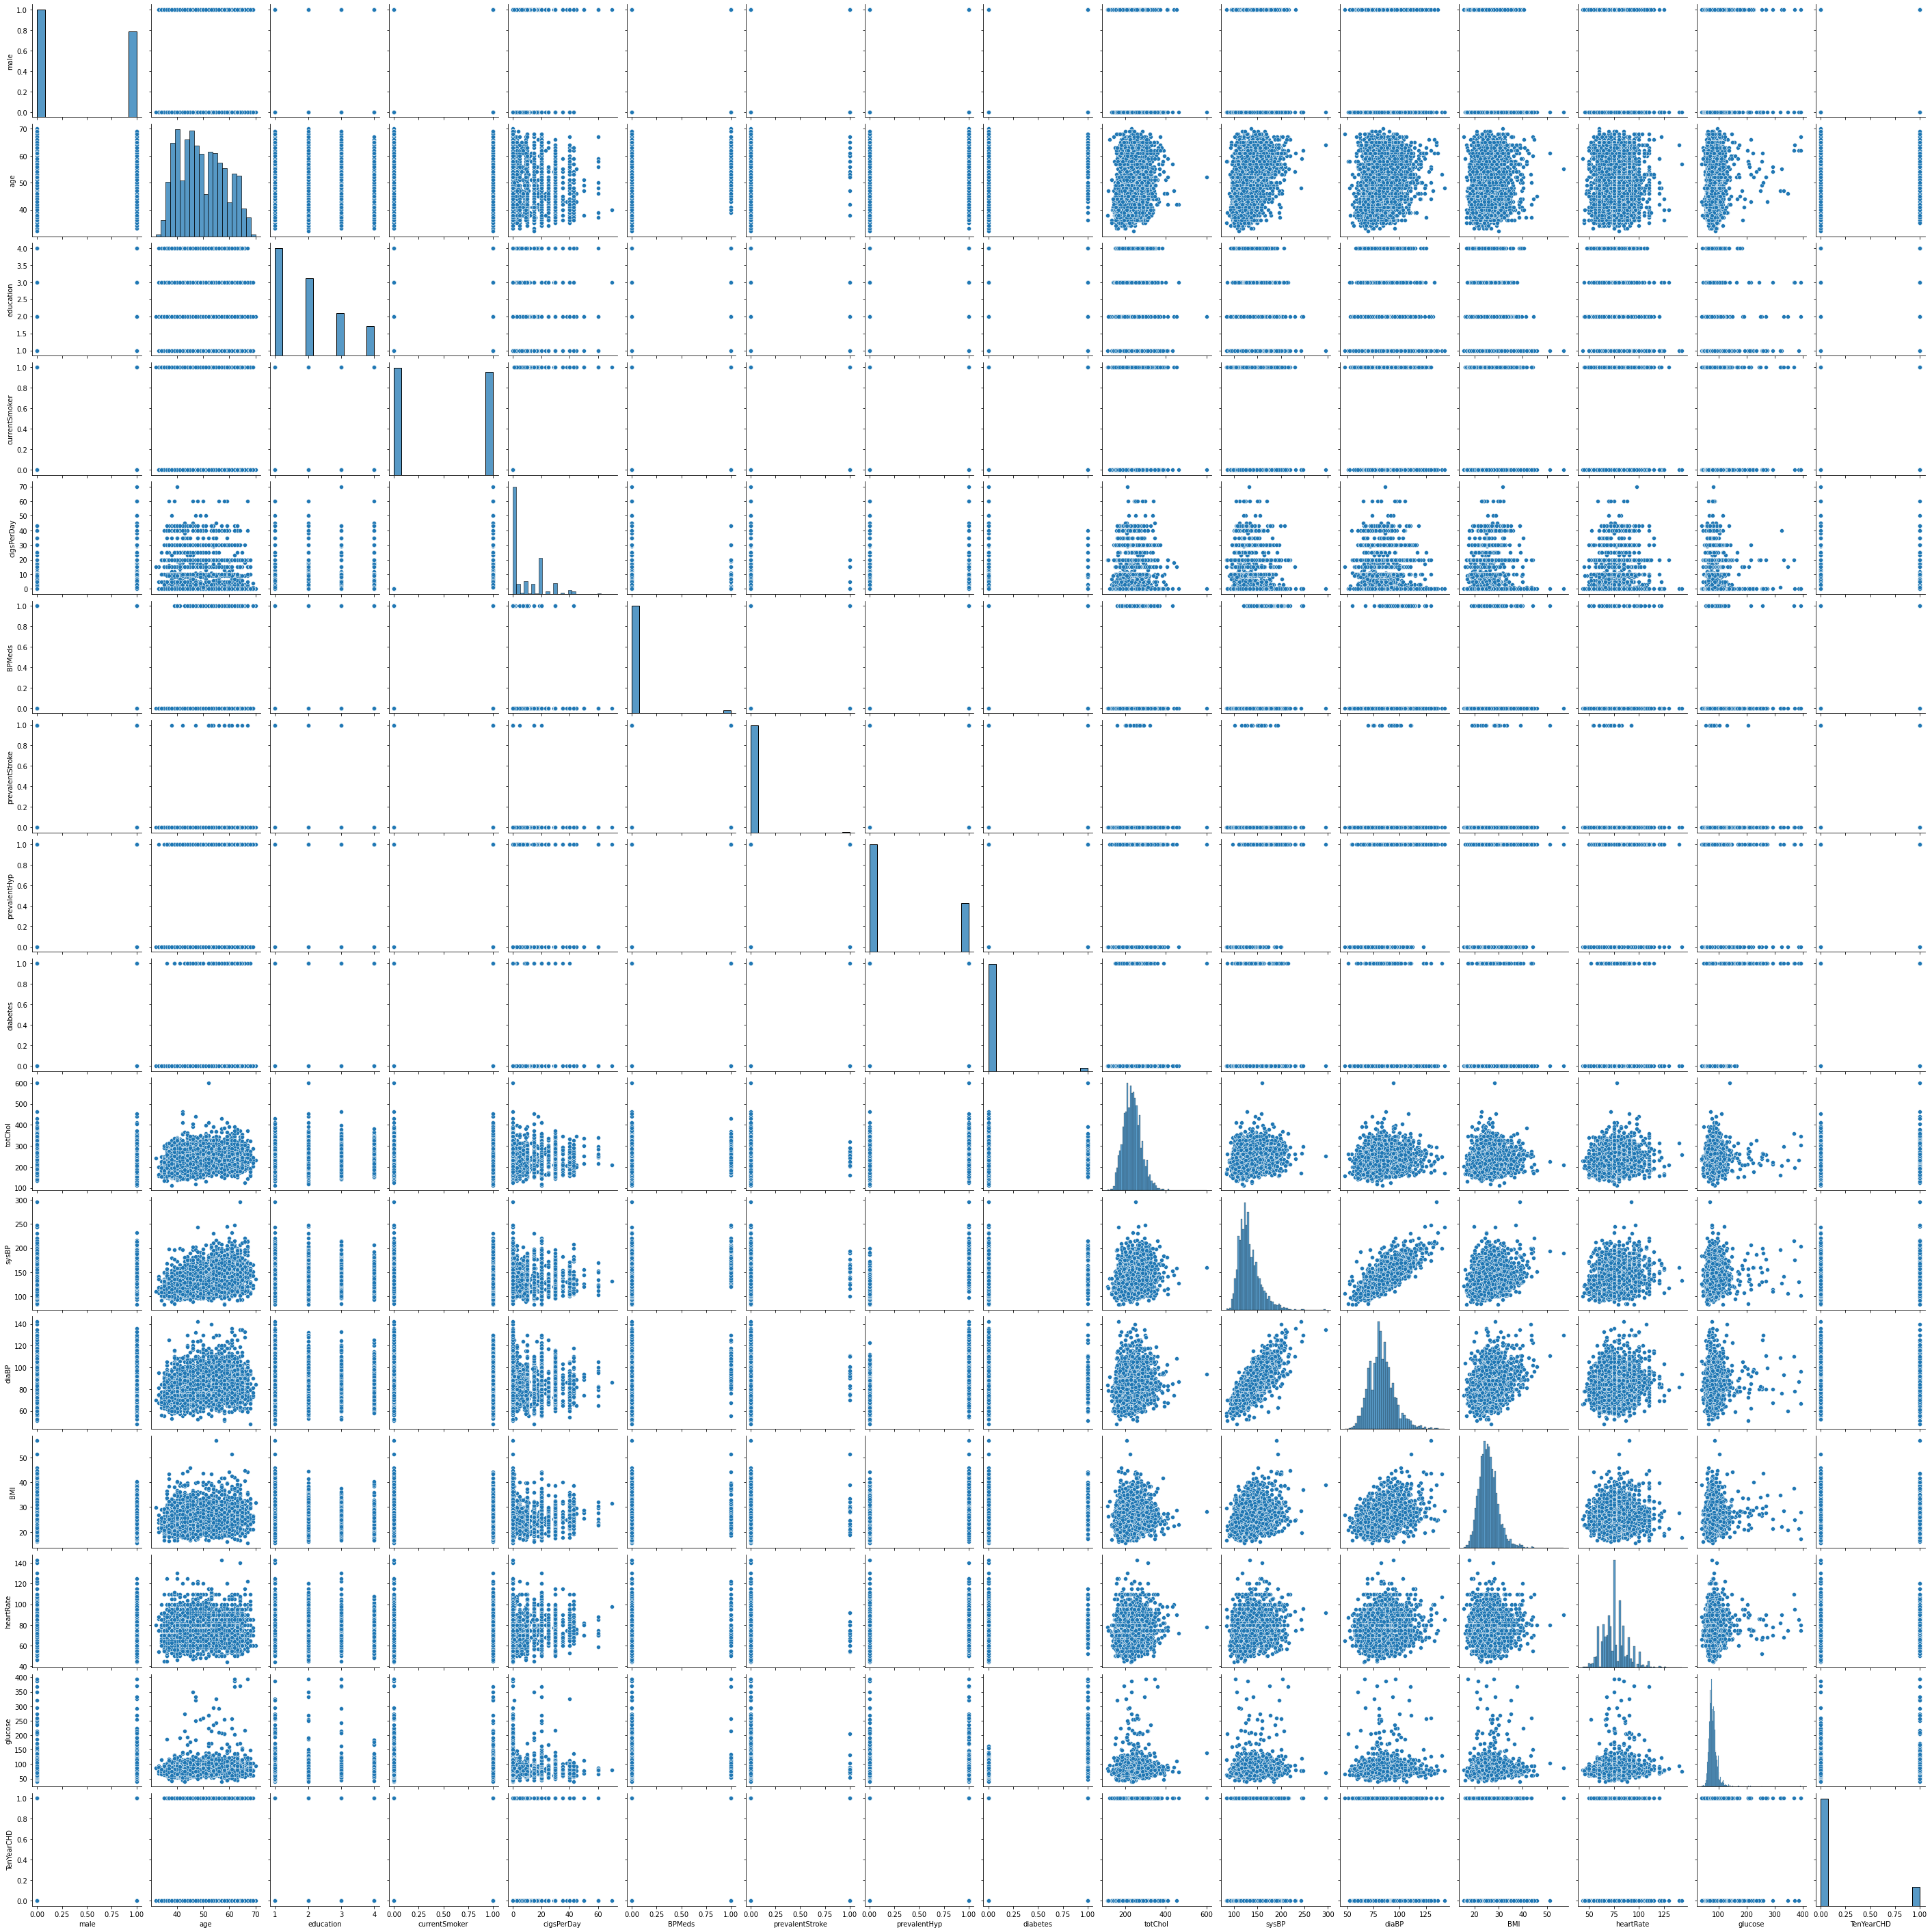

In [ ]:
# outliers
df_heart.describe()
sns.pairplot(df_heart)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1111,0,52,2.0,0,0.0,0.0,0,1,1,600.0,159.5,94.0,28.27,78.0,140.0,1


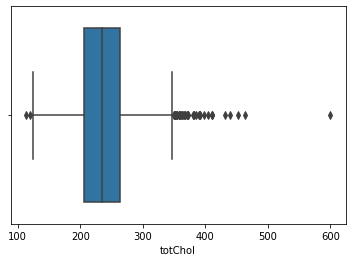

In [ ]:
# Colesterol outliers
sns.boxplot(df_heart.totChol)
outliers = df_heart[(df_heart['totChol'] > 500)] 
outliers

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


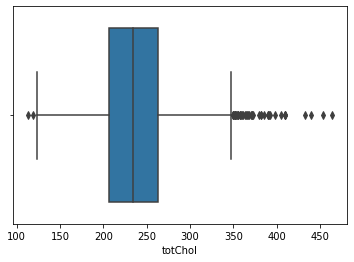

In [ ]:
# Dropar 2 outliers de colesterol
df_heart = df_heart.drop(df_heart[df_heart.totChol > 599].index)
sns.boxplot(df_heart.totChol)

In [ ]:
df_clean = df_heart

In [ ]:
df_clean.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Selecao de Features para o Modelo:

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
# separate independent & dependent variables
X = df_clean.iloc[:,0:15]  #independent columns
y = df_clean.iloc[:,-1]    #target column i.e price range

In [ ]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4231    0
4232    1
4233    1
4234    0
4237    0
Name: TenYearCHD, Length: 3655, dtype: int64

In [ ]:
# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 15 best features

              Specs       Score
10            sysBP  665.803731
14          glucose  370.510431
1               age  295.496252
9           totChol  221.365884
4        cigsPerDay  159.713697
11            diaBP  141.966185
7      prevalentHyp   82.267595
8          diabetes   28.837950
5            BPMeds   28.260500
0              male   17.357871
12              BMI   15.603716
6   prevalentStroke    8.525723
2         education    7.694642
13        heartRate    2.888815
3     currentSmoker    0.733808


In [ ]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Specs,Score
10,sysBP,665.803731
14,glucose,370.510431
1,age,295.496252
9,totChol,221.365884
4,cigsPerDay,159.713697
11,diaBP,141.966185
7,prevalentHyp,82.267595
8,diabetes,28.837950
5,BPMeds,28.260500
0,male,17.357871


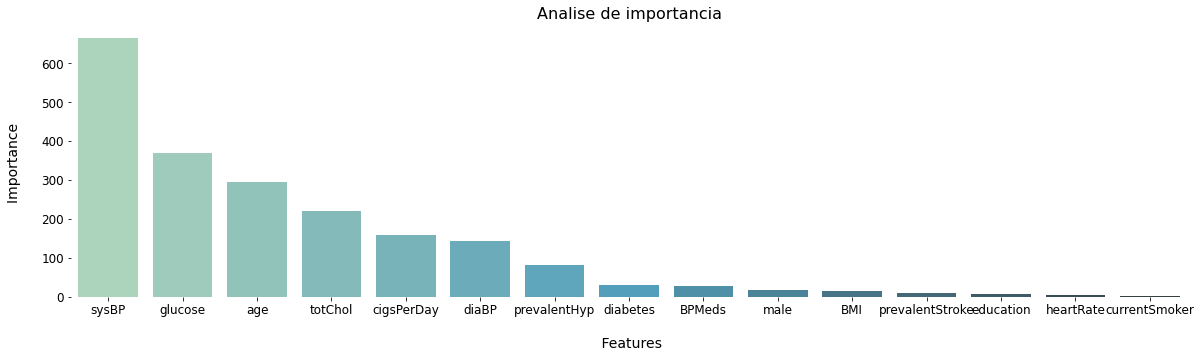

In [ ]:
# visualizacao do grau de importancia de cada feature
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Analise de importancia', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
## Selecionar as 10 features mais importantes 

In [ ]:
features_list = featureScores["Specs"].tolist()[:11]
features_list

['sysBP',
 'glucose',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'male',
 'BMI']

In [ ]:
heart_df = df_clean[['sysBP',
 'glucose',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'male',
 'BMI']]
heart_df

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,BMI
0,106.0,77.0,39,195.0,0.0,70.0,0,0,0.0,1,26.97
1,121.0,76.0,46,250.0,0.0,81.0,0,0,0.0,0,28.73
2,127.5,70.0,48,245.0,20.0,80.0,0,0,0.0,1,25.34
3,150.0,103.0,61,225.0,30.0,95.0,1,0,0.0,0,28.58
4,130.0,85.0,46,285.0,23.0,84.0,0,0,0.0,0,23.10
...,...,...,...,...,...,...,...,...,...,...,...
4231,141.0,81.0,58,187.0,0.0,81.0,1,0,0.0,1,24.96
4232,168.0,79.0,68,176.0,0.0,97.0,1,0,0.0,1,23.14
4233,179.0,86.0,50,313.0,1.0,92.0,1,0,0.0,1,25.97
4234,126.5,68.0,51,207.0,43.0,80.0,0,0,0.0,1,19.71


###Tranformas a escala das features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1)) 

#definir escala para a column:
df_scaled = pd.DataFrame(scaler.fit_transform(heart_df), columns=heart_df.columns)

In [ ]:
df_scaled.describe()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,BMI
count,3655.000000,3655.000000,3655.000000,3655.000000,3655.000000,3655.000000,3655.000000,3655.000000,3655.000000,3655.000000,3655.000000
mean,0.231019,0.118193,0.462020,0.352632,0.128923,0.369408,0.311354,0.026813,0.030369,0.443776,0.248267
std,0.104449,0.067497,0.225321,0.124476,0.170279,0.126720,0.463111,0.161557,0.171625,0.496897,0.098552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.158392,0.087571,0.263158,0.264957,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.182744
50%,0.210402,0.107345,0.447368,0.344729,0.000000,0.359788,0.000000,0.000000,0.000000,0.000000,0.238488
75%,0.284870,0.132768,0.631579,0.427350,0.285714,0.444444,1.000000,0.000000,0.000000,1.000000,0.302836
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
heart_df.describe()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,BMI
count,3655.000000,3655.000000,3655.000000,3655.000000,3655.000000,3655.000000,3655.000000,3655.000000,3655.000000,3655.000000,3655.000000
mean,132.360602,81.840219,49.556772,236.773735,9.024624,82.909029,0.311354,0.026813,0.030369,0.443776,25.783505
std,22.090906,23.894041,8.562209,43.691102,11.919565,11.975058,0.463111,0.161557,0.171625,0.496897,4.066261
min,83.500000,40.000000,32.000000,113.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,15.540000
25%,117.000000,71.000000,42.000000,206.000000,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000,23.080000
50%,128.000000,78.000000,49.000000,234.000000,0.000000,82.000000,0.000000,0.000000,0.000000,0.000000,25.380000
75%,143.750000,87.000000,56.000000,263.000000,20.000000,90.000000,1.000000,0.000000,0.000000,1.000000,28.035000
max,295.000000,394.000000,70.000000,464.000000,70.000000,142.500000,1.000000,1.000000,1.000000,1.000000,56.800000


### Test - Train Split 

In [ ]:
# Definir Y e X, remover o 'gabarito'
y = df_clean.iloc[:,-1]
X = df_scaled

# train test: 80 % - 20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

In [ ]:
len(X_train)

2924

In [ ]:
len(X_test)

731

In [ ]:
len(y_train)

2924

In [ ]:
len(y_test)

731

## Logistic Regression

In [ ]:
df_logreg = LogisticRegression().fit(X_train, y_train)

Y_logreg_pred = df_logreg.predict(X_test)

### Scores:

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
acc = accuracy_score(y_test, Y_logreg_pred)
print(f"The accuracy LogReg is: {round(acc,3)*100}%")

The accuracy score for LogReg is: 83.2%


In [ ]:
f1 = f1_score(y_test, Y_logreg_pred)
print(f"The f1 LogReg is: {round(f1,3)*100}%")


The f1 score for LogReg is: 12.8%


In [ ]:
precision = precision_score(y_test, Y_logreg_pred)
print(f"The precision LogReg is: {round(precision,3)*100}%")

The precision score for LogReg is: 81.8%


In [ ]:
recall = recall_score(y_test, Y_logreg_pred)
print(f"The recall LogReg is: {round(recall,3)*100}%")

The recall score for LogReg is: 6.9%


In [ ]:
# Matriz de confusão LogReg
cnf_matrix_log = confusion_matrix(y_test, Y_logreg_pred)
print(cnf_matrix_log)

[[599   2]
 [121   9]]


Text(0.5, 1.1, 'Matriz de confusão Logistic Regression\n')

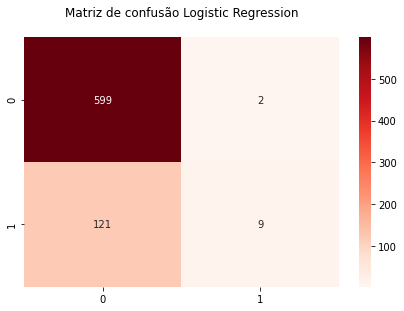

In [ ]:
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusão Logistic Regression\n', y=1.1)

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
df_gaussian = GaussianNB().fit(X_train, y_train)

Y_gaussian_pred = df_gaussian.predict(X_test)


### Scores

In [ ]:
acc = accuracy_score(y_test, Y_gaussian_pred)
print(f"The accuracy Naive Bayes is: {round(acc,3)*100}%")

The accuracy score for Naive Bayes is: 80.0%


In [ ]:
f1 = f1_score(y_test, Y_gaussian_pred)
print(f"The f1 LogReg is: {round(f1,3)*100}%")

The f1 score for LogReg is: 29.799999999999997%


In [ ]:
recall = recall_score(y_test, Y_gaussian_pred)
print(f"The recall LogReg is: {round(recall,3)*100}%")

The recall score for LogReg is: 23.799999999999997%


In [ ]:
# Matriz de confusão LogReg
cnf_matrix_gau = confusion_matrix(y_test, Y_gaussian_pred)
print(cnf_matrix_log)

[[599   2]
 [121   9]]


Text(0.5, 1.1, 'Matriz de confusão Logistic Regression\n')

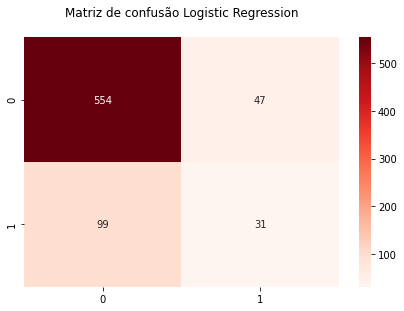

In [ ]:
sns.heatmap(pd.DataFrame(cnf_matrix_gau), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusão Logistic Regression\n', y=1.1)

## Curva ROC

'''the AUC ROC Curve is a measure of performance based on plotting the true positive and false positive rate 
and calculating the area under that curve.The closer the score to 1 the better the algorithm's ability to 
distinguish between the two outcome classes.'''

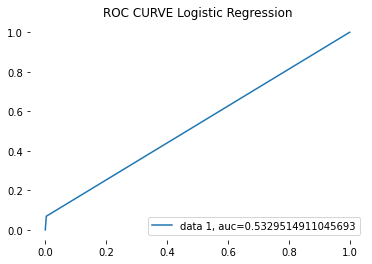

The score for the AUC ROC Curve is: 53.300000000000004%


In [ ]:
# Modelo Logistico

fpr, tpr, _ = roc_curve(y_test, Y_logreg_pred)
auc = roc_auc_score(y_test, Y_logreg_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.box(False)
plt.title ('ROC CURVE Logistic Regression')
plt.show()

print(f"The AUC ROC Curve is: {round(auc,3)*100}%")

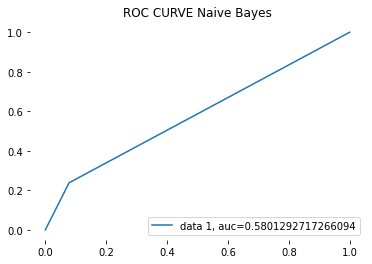

The score for the AUC ROC Curve is: 57.99999999999999%


In [ ]:
# Modelo Gaussiano

fpr, tpr, _ = roc_curve(y_test, Y_gaussian_pred)
auc = roc_auc_score(y_test, Y_gaussian_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.box(False)
plt.title ('ROC CURVE Naive Bayes')
plt.show()

print(f"The AUC ROC Curve is: {round(auc,3)*100}%")